In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import string
import unicodedata
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


##load dataset, print shape of data, data description

In [5]:
df = pd.read_csv("/content/drive/My Drive/Tweets.csv")
# print shape
df.shape 


(14640, 15)

In [6]:
# print description
df.describe

<bound method NDFrame.describe of                  tweet_id  ...               user_timezone
0      570306133677760513  ...  Eastern Time (US & Canada)
1      570301130888122368  ...  Pacific Time (US & Canada)
2      570301083672813571  ...  Central Time (US & Canada)
3      570301031407624196  ...  Pacific Time (US & Canada)
4      570300817074462722  ...  Pacific Time (US & Canada)
...                   ...  ...                         ...
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[14640 rows x 15 columns]>

In [7]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
# check for null values
df.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
# Get the required data for the columns and shuffle
df= df.reindex(np.random.permutation(df.index))
df =df[['text','airline_sentiment']]

In [10]:
df.head()

,text,airline_sentiment
7084,@JetBlue toss this ticket...it's great PR and ...,positive
3785,@united chase says no referral bonus. Thanks.,neutral
3266,@united an update on flight 5979 would be great!,negative
7751,@JetBlue no more than half an hour wait. It's ...,negative
87,@VirginAmerica Random Q: what's the distributi...,neutral


# EDA
Shape of the data

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


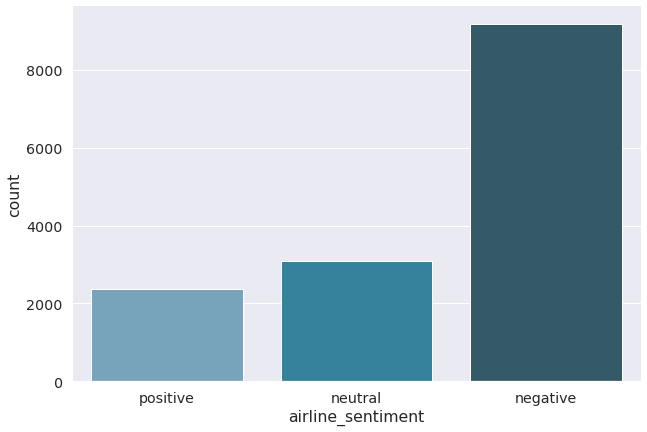

In [11]:
sns.factorplot(x="airline_sentiment", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [12]:
# print first rows of new data
df.head(5)

,text,airline_sentiment
7084,@JetBlue toss this ticket...it's great PR and ...,positive
3785,@united chase says no referral bonus. Thanks.,neutral
3266,@united an update on flight 5979 would be great!,negative
7751,@JetBlue no more than half an hour wait. It's ...,negative
87,@VirginAmerica Random Q: what's the distributi...,neutral


## Text Pre processing


In [13]:
# html tag removal
def cleanhtml(text): 
  bs = BeautifulSoup(text, "html.parser")
  return bs.get_text()
df['text'] = df['text'].apply(lambda x:cleanhtml(x))
df.head()

,text,airline_sentiment
7084,@JetBlue toss this ticket...it's great PR and ...,positive
3785,@united chase says no referral bonus. Thanks.,neutral
3266,@united an update on flight 5979 would be great!,negative
7751,@JetBlue no more than half an hour wait. It's ...,negative
87,@VirginAmerica Random Q: what's the distributi...,neutral


In [14]:
#Remove the numbers
def remove_digits(text):
  return re.sub('\d+', '', text)
df['text'] = df['text'].apply(lambda x:remove_digits(x))
df.head()

,text,airline_sentiment
7084,@JetBlue toss this ticket...it's great PR and ...,positive
3785,@united chase says no referral bonus. Thanks.,neutral
3266,@united an update on flight would be great!,negative
7751,@JetBlue no more than half an hour wait. It's ...,negative
87,@VirginAmerica Random Q: what's the distributi...,neutral


In [15]:
!pip install contractions

     |████████████████████████████████| 317kB 3.7MB/s 
     |████████████████████████████████| 245kB 16.8MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81700 sha256=c2ee00af45d7cbea50344957b6d0bcb1f8d7ad4837d68e86c07affb1066292e2
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [16]:
def remove_urls(text):
  return re.sub(r'http.?://[^\s]+[\s]?', '', text)
df['text'] = df['text'].apply(lambda x:remove_urls(x))
df.head()

,text,airline_sentiment
7084,@JetBlue toss this ticket...it's great PR and ...,positive
3785,@united chase says no referral bonus. Thanks.,neutral
3266,@united an update on flight would be great!,negative
7751,@JetBlue no more than half an hour wait. It's ...,negative
87,@VirginAmerica Random Q: what's the distributi...,neutral


In [17]:
import contractions 

In [18]:
# Remove special characters and punctuation
def removespc(text): 
  return contractions.fix(text)
df['text'] = df['text'].apply(lambda x:removespc(x))
df.head()

,text,airline_sentiment
9551,@USAirways your phone system is not working at...,negative
7844,@JetBlue that I missed my flight. I had to boo...,negative
12447,@AmericanAir that is what is on my ticket and ...,neutral
11059,@UsAirways your person taking tickets is rude...,negative
10449,@USAirways your ticket agents at gate in Prov...,positive


In [18]:
def strip_mentions_hashtags(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
df['text'] = df['text'].apply(lambda x:strip_mentions_hashtags(x))
df.head()

,text,airline_sentiment
7084,toss this ticket it s great PR and I m sure ev...,positive
3785,chase says no referral bonus Thanks,neutral
3266,an update on flight would be great,negative
7751,no more than half an hour wait It s unreal Fin...,negative
87,Random Q what s the distribution of elevate av...,neutral


In [19]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
df['text'] = df['text'].apply(lambda x:remove_special_characters(x))
df.head()

,text,airline_sentiment
7084,toss this ticket it s great PR and I m sure ev...,positive
3785,chase says no referral bonus Thanks,neutral
3266,an update on flight would be great,negative
7751,no more than half an hour wait It s unreal Fin...,negative
87,Random Q what s the distribution of elevate av...,neutral


In [20]:
def emoji_oneword(text):
  return text.replace('_','')
df['text'] = df['text'].apply(lambda x:emoji_oneword(x))
df.head()

,text,airline_sentiment
7084,toss this ticket it s great PR and I m sure ev...,positive
3785,chase says no referral bonus Thanks,neutral
3266,an update on flight would be great,negative
7751,no more than half an hour wait It s unreal Fin...,negative
87,Random Q what s the distribution of elevate av...,neutral


In [21]:
# Conversion to lowercase
def to_lower(text):
  return text.lower()
df['text'] = df['text'].apply(lambda x:to_lower(x))
df.head()

,text,airline_sentiment
7084,toss this ticket it s great pr and i m sure ev...,positive
3785,chase says no referral bonus thanks,neutral
3266,an update on flight would be great,negative
7751,no more than half an hour wait it s unreal fin...,negative
87,random q what s the distribution of elevate av...,neutral


In [22]:

# now tokenize text
df['text'] = df['text'].apply(nltk.word_tokenize)
df.head()

,text,airline_sentiment
7084,"[toss, this, ticket, it, s, great, pr, and, i,...",positive
3785,"[chase, says, no, referral, bonus, thanks]",neutral
3266,"[an, update, on, flight, would, be, great]",negative
7751,"[no, more, than, half, an, hour, wait, it, s, ...",negative
87,"[random, q, what, s, the, distribution, of, el...",neutral


In [24]:
# make a copy so do not have to start
ddf = df.copy()

In [25]:
ddf.head()

,text,airline_sentiment
9551,"[your, phone, system, is, not, working, at, al...",negative
7844,"[that, i, missed, my, flight, i, had, to, book...",negative
12447,"[that, is, what, is, on, my, ticket, and, my, ...",neutral
11059,"[your, person, taking, tickets, is, rude, and,...",negative
10449,"[your, ticket, agents, at, gate, in, providenc...",positive


In [26]:
stopwords = stopwords.words('english')

### Lemmatize

In [27]:
lematizer = WordNetLemmatizer()

def remove_non_ascii( words):
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

def remove_stop_words( words):
  new_words = []
  for word in words:
   if word not in stopwords:
    new_words.append(word)
  return new_words

def lemlist( words):
  new_words = []
  for word in words:
   if word not in stopwords:
    new_words.append(lematizer.lemmatize(word, pos = 'v'))
  return new_words

def applyall(words):
  words = remove_non_ascii( words)
  words = remove_stop_words( words)
  words = lemlist( words)
  return ' '.join(words)

ddf['text'] = ddf.apply(lambda row:applyall(row['text']), axis=1)
# print first 5 rows
ddf.head(5)

,text,airline_sentiment
9551,phone system work bump time need get mco,negative
7844,miss flight book flight extremely last minute ...,negative
12447,ticket confirmation email anything else,neutral
11059,person take ticket rude delay minutes overfill...,negative
10449,ticket agents gate providence airport rock ton...,positive


## vectorization


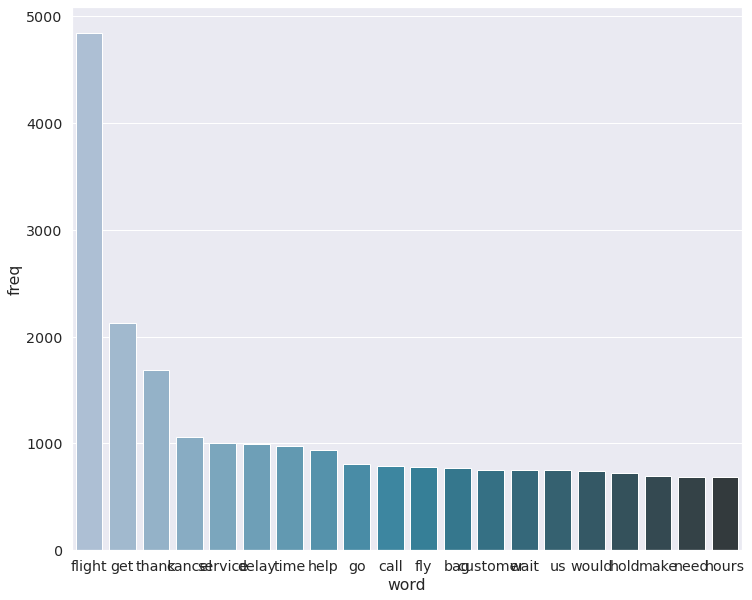

In [59]:
import collections
# using CountVector
vect = CountVectorizer(analyzer = "word")
bow = vect.fit_transform(ddf['text'])
#features_array = features.toarray()
#features_array.shape
word_freq = dict(zip(vect.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [30]:
# convert Bow into features
features = bow.toarray() 
features.shape

(14640, 8062)

In [ ]:
# convert categorical into numeric
#rating = {'negative': -1,'neutral': 0, 'positive': 2} 
#ddf.airline_sentiment[ddf.airline_sentiment=='negative'] = -1
#ddf.airline_sentiment[ddf.airline_sentiment=='neutral'] = 0
#ddf.airline_sentiment[ddf.airline_sentiment=='positive'] = 1
#ddf['airline_sentiment'] = ddf['airline_sentiment'].astype(int)

#print(ddf.dtypes)

In [ ]:
#labels = ddf['airline_sentiment'] 

## split data


In [31]:
clean_train, clean_test = train_test_split(ddf, test_size=0.2, random_state=45)


In [34]:
print(clean_train.dtypes)

text                 object
airline_sentiment    object
dtype: object


## Fit and Transform using CountVectorzer

In [55]:
vec = CountVectorizer(analyzer = "word") # we can resuse the same from above
train_features= vec.fit_transform(clean_train['text'])
test_features=vec.transform(clean_test['text'])

In [56]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [57]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,clean_train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,clean_train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,clean_test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))  

Accuracy of LogisticRegression is 0.6287568306010929
Accuracy of KNeighborsClassifier is 0.5683060109289617
Accuracy of SVC is 0.6717896174863388
Accuracy of DecisionTreeClassifier is 0.6837431693989071
Accuracy of RandomForestClassifier is 0.7568306010928961
Accuracy of AdaBoostClassifier is 0.7076502732240437
Accuracy of GaussianNB is 0.43135245901639346


Text(0.5, 1.0, 'Accuracies of Models')

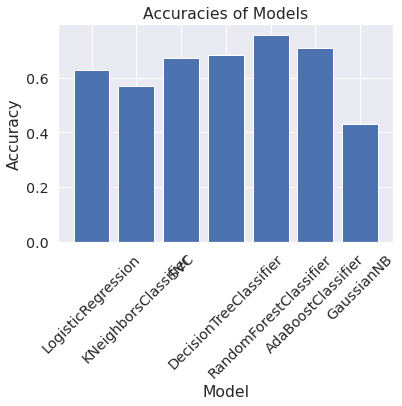

In [58]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

## Now try with TfidVectorizer

In [62]:
tvec = TfidfVectorizer() 
train_features1 = tvec.fit_transform(clean_train['text'])
test_features1 =tvec.transform(clean_test['text'])
dense_features=train_features1.toarray()
dense_test= test_features1.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,clean_train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,clean_train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,clean_test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))  

Accuracy of LogisticRegression is 0.6287568306010929
Accuracy of KNeighborsClassifier is 0.5683060109289617
Accuracy of SVC is 0.6717896174863388
Accuracy of DecisionTreeClassifier is 0.6810109289617486
Accuracy of RandomForestClassifier is 0.757172131147541
Accuracy of AdaBoostClassifier is 0.7076502732240437
Accuracy of GaussianNB is 0.4327185792349727


Text(0.5, 1.0, 'Accuracies of Models')

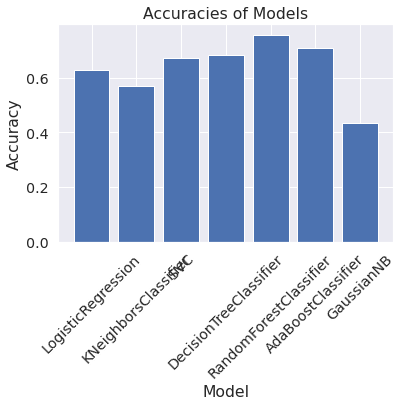

In [63]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

# Summary
RandomForestClassifier with CountVentor provide better results compared to
Decision Tree with Tfidf

#Try with RNN

In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [23]:
ddf1 = df.copy()

In [24]:
ddf1.head()

,text,airline_sentiment
7084,"[toss, this, ticket, it, s, great, pr, and, i,...",positive
3785,"[chase, says, no, referral, bonus, thanks]",neutral
3266,"[an, update, on, flight, would, be, great]",negative
7751,"[no, more, than, half, an, hour, wait, it, s, ...",negative
87,"[random, q, what, s, the, distribution, of, el...",neutral


In [27]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(ddf1['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9979 unique tokens.


In [28]:
X = tokenizer.texts_to_sequences(ddf1['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (14640, 250)


In [30]:
Y = pd.get_dummies(ddf1['airline_sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (14640, 3)


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(13176, 250) (13176, 3)
(1464, 250) (1464, 3)


In [37]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 5,080,703
Trainable params: 5,080,703
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
from keras.callbacks import EarlyStopping
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
186/186 [==============================] - 164s 884ms/step - loss: 0.7243 - accuracy: 0.7014 - val_loss: 0.5476 - val_accuracy: 0.8027
Epoch 2/5
186/186 [==============================] - 170s 912ms/step - loss: 0.4785 - accuracy: 0.8145 - val_loss: 0.4961 - val_accuracy: 0.8118
Epoch 3/5
186/186 [==============================] - 171s 921ms/step - loss: 0.3616 - accuracy: 0.8621 - val_loss: 0.4864 - val_accuracy: 0.8232
Epoch 4/5
186/186 [==============================] - 170s 911ms/step - loss: 0.2898 - accuracy: 0.8924 - val_loss: 0.5501 - val_accuracy: 0.8058
Epoch 5/5
186/186 [==============================] - 171s 918ms/step - loss: 0.2359 - accuracy: 0.9147 - val_loss: 0.5834 - val_accuracy: 0.8141


In [39]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

46/46 [==============================] - 3s 62ms/step - loss: 0.6468 - accuracy: 0.7821
Test set
  Loss: 0.647
  Accuracy: 0.782


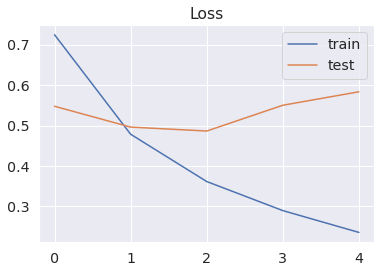

In [40]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

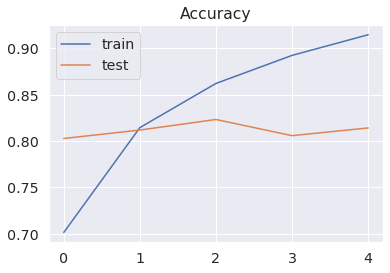

In [42]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();